In [1]:
import pandas as pd
import numpy as np
import regex as re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'datasets\train.csv')
raw_data=df.copy()
df.head()

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption
0,01/01/2002 00,1,Studio,15.31,46.61,1.06,0.97,Low,0,Swimming Pool,0.0,64.85
1,01/01/2002 08,4,NaN,21.01,66.11,2.98,0.91,Upper Middle,1,Swimming Pool,1.0,192.50
2,01/01/2002 16,2,Cottage,12.86,60.86,1.44,1.43,Middle,0,NaN,1.0,116.62
3,02/01/2002 00,2,1BHK,20.16,50.58,1.48,0.91,Middle,-1,Garden,0.0,76.96
4,02/01/2002 08,2,Cottage,16.23,52.25,1.14,1.11,Middle,0,Fountain,0.0,104.70


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 14000 non-null  object 
 1   Residents                 14000 non-null  int64  
 2   Apartment_Type            13574 non-null  object 
 3   Temperature               13559 non-null  float64
 4   Humidity                  14000 non-null  object 
 5   Water_Price               14000 non-null  float64
 6   Period_Consumption_Index  14000 non-null  float64
 7   Income_Level              13574 non-null  object 
 8   Guests                    14000 non-null  int64  
 9   Amenities                 8003 non-null   object 
 10  Appliance_Usage           13585 non-null  float64
 11  Water_Consumption         14000 non-null  float64
dtypes: float64(5), int64(2), object(5)
memory usage: 1.3+ MB


In [4]:
df.describe()

,Residents,Temperature,Water_Price,Period_Consumption_Index,Guests,Appliance_Usage,Water_Consumption
count,14000.000000,13559.000000,14000.000000,14000.000000,14000.000000,13585.000000,14000.000000
mean,2.078429,22.566559,0.657924,1.152890,0.292929,0.201987,164.461230
std,9.241665,7.216447,8.765776,0.229047,0.489164,0.401498,72.873894
min,-99.000000,10.000000,-99.000000,-0.130782,-2.000000,0.000000,35.540000
25%,2.000000,16.340000,1.320000,0.970000,0.000000,0.000000,109.550000
50%,3.000000,22.580000,1.630000,1.150000,0.000000,0.000000,150.375000
75%,4.000000,28.850000,2.112500,1.330000,1.000000,0.000000,206.765000
max,5.000000,35.000000,3.000000,2.352311,3.000000,1.000000,531.490000


## Changing DataTypes

In [5]:
df.dtypes

Timestamp                    object
Residents                     int64
Apartment_Type               object
Temperature                 float64
Humidity                     object
Water_Price                 float64
Period_Consumption_Index    float64
Income_Level                 object
Guests                        int64
Amenities                    object
Appliance_Usage             float64
Water_Consumption           float64
dtype: object

## Data Cleaning

In [6]:
df.isnull().sum()

Timestamp                      0
Residents                      0
Apartment_Type               426
Temperature                  441
Humidity                       0
Water_Price                    0
Period_Consumption_Index       0
Income_Level                 426
Guests                         0
Amenities                   5997
Appliance_Usage              415
Water_Consumption              0
dtype: int64

In [7]:
df['Timestamp']=pd.to_datetime(df['Timestamp'],format="mixed",dayfirst=True)

mean_humidity = pd.to_numeric(df['Humidity'], errors='coerce').mean()
df['Humidity'] = df['Humidity'].apply(lambda x: mean_humidity if re.search('[a-zA-Z<>()@=/?#$%&*!%]', str(x)) else x)
df['Humidity'] = df['Humidity'].astype(float)

residents_mode=df['Residents'].mode()[0]
df['Residents'] = df['Residents'].apply(lambda y: residents_mode if re.search('[-]', str(y)) else y)

df['Apartment_Type'].isnull().sum()
df['Apartment_Type'].fillna(df['Apartment_Type'].mode()[0],inplace=True)

df['Temperature'].isnull().sum()
df['Temperature'].fillna(df['Temperature'].mean(),inplace=True)

income_mode=df['Income_Level'].mode()[0]
df['Income_Level']=df['Income_Level'].apply(lambda x: income_mode if re.search('^[a-zA-Z0-9[:punct:]]{4,5}$',str(x)) else x)
df['Income_Level'].fillna(income_mode,inplace=True)

df['Amenities'].fillna(df['Amenities'].mode()[0],inplace=True)

df['Appliance_Usage'].fillna(df['Appliance_Usage'].mode()[0],inplace=True)

guest_mode=df['Guests'].mode()[0]
df['Guests']=df['Guests'].apply(lambda z : guest_mode if re.search('-',str(z)) else z)

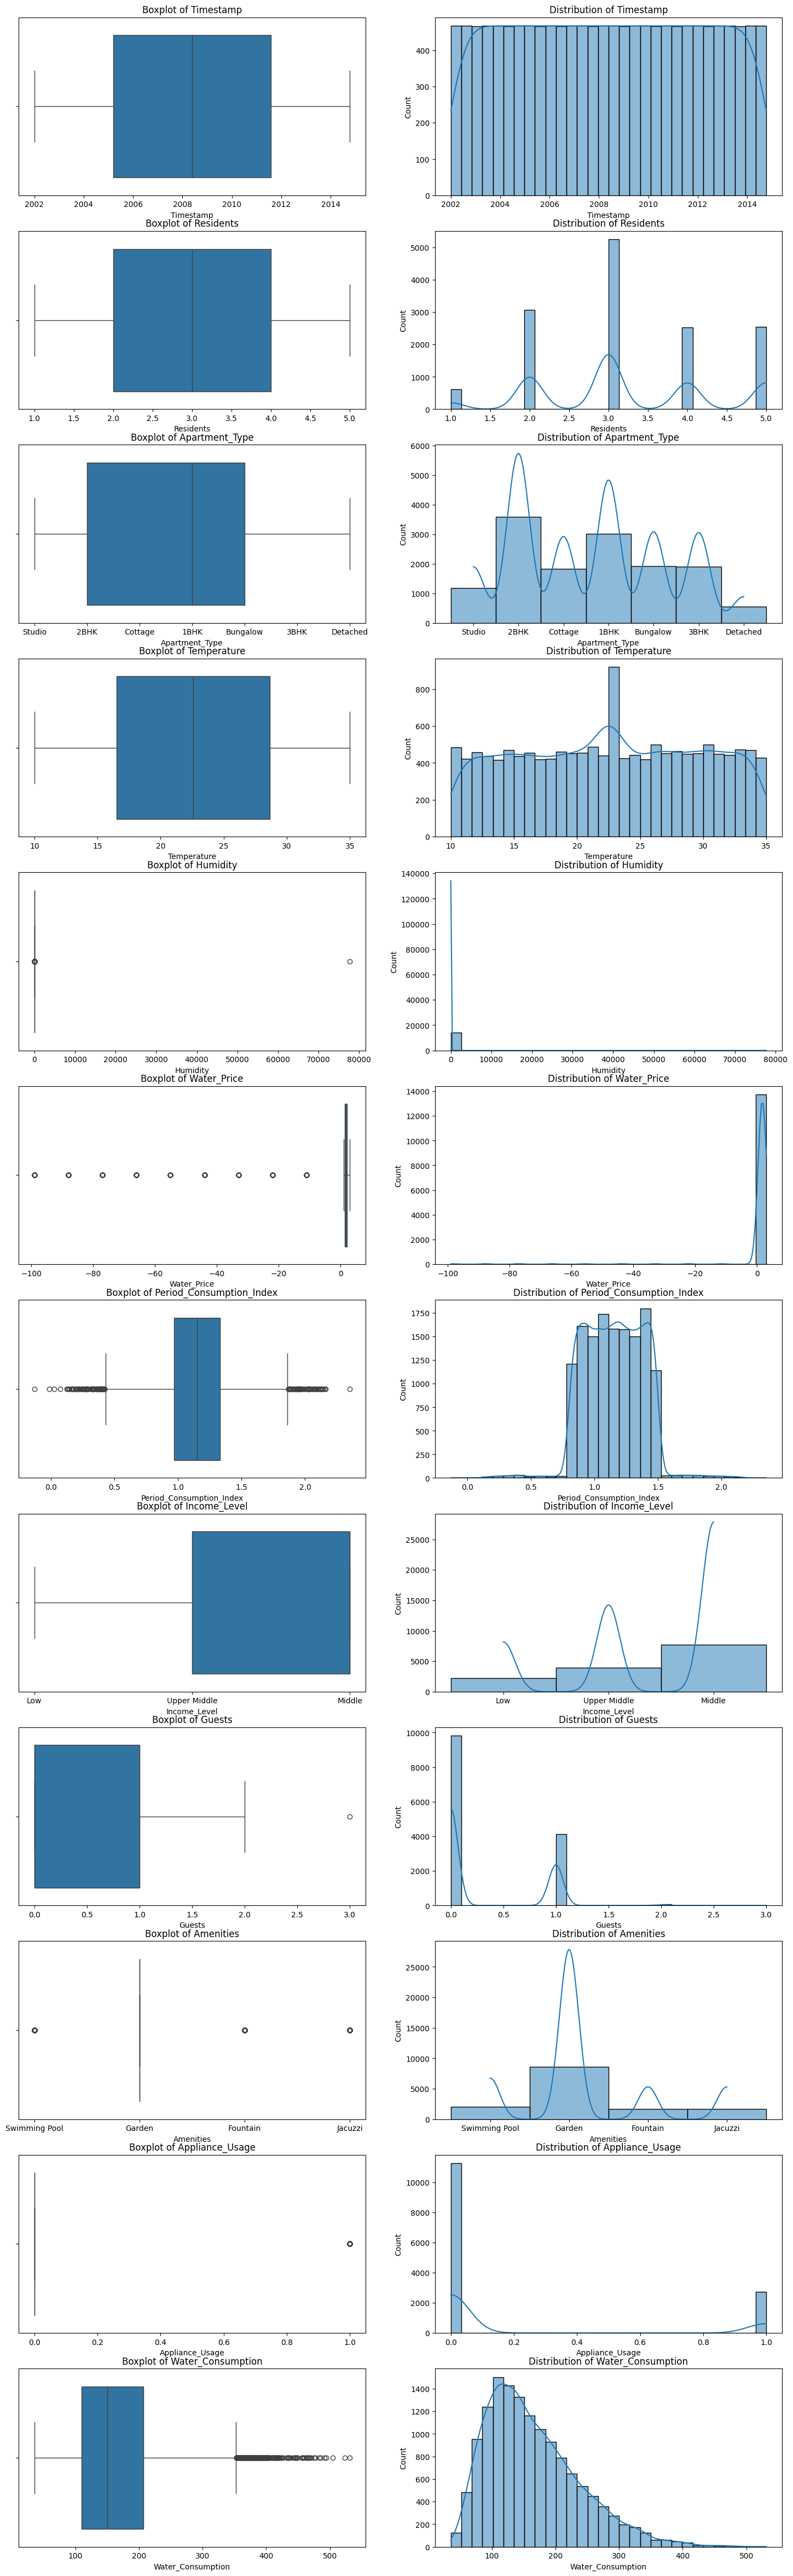

In [8]:
columns=df.columns
fig, axes = plt.subplots(len(columns), 2, figsize=(18, len(columns)*5))
for i, col in enumerate(columns):
    sns.boxplot(x=df[col], ax=axes[i,0], data=df)
    axes[i,0].set_title(f"Boxplot of {col}")
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i,1])
    axes[i,1].set_title(f"Distribution of {col}")
plt.show()

In [9]:
# Removing outliers (capping extreme values)
df["Residents"] = df["Residents"].clip(lower=0, upper=5)
df["Guests"] = df["Guests"].clip(lower=0, upper=2)
df["Water_Price"] = df["Water_Price"].clip(lower=1.0)
df['Period_Consumption_Index']=df['Period_Consumption_Index'].clip(lower=0.5,upper=1.8)
df['Humidity']=df['Humidity'].clip(lower=28,upper=75)
df['Water_Consumption']=df['Water_Consumption'].clip(lower=1.0,upper=350)
df['Appliance_Usage']=df['Appliance_Usage'].clip(upper=0.002)

## Feature Engineering

In [10]:
datetime_cols = df.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    df[f'{col}_year'] = df[col].dt.year
    df[f'{col}_month'] = df[col].dt.month
    df[f'{col}_day'] = df[col].dt.day
    df[f'{col}_dayofweek'] = df[col].dt.dayofweek

In [11]:
from sklearn.preprocessing import LabelEncoder
cat_features=df.select_dtypes(exclude=['int64','float64','int32']).columns
encoder=LabelEncoder()
for col in cat_features:
    df[col]=encoder.fit_transform(df[col])

In [12]:
df

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage,Water_Consumption,Timestamp_year,Timestamp_month,Timestamp_day,Timestamp_dayofweek
0,0,1,6,15.310000,46.61,1.06,0.97,0,0,3,0.000,64.85,2002,1,1,1
1,1,4,1,21.010000,66.11,2.98,0.91,2,1,3,0.002,192.50,2002,1,1,1
2,2,2,4,12.860000,60.86,1.44,1.43,1,0,1,0.002,116.62,2002,1,1,1
3,3,2,0,20.160000,50.58,1.48,0.91,1,0,1,0.000,76.96,2002,1,2,2
4,4,2,4,16.230000,52.25,1.14,1.11,1,0,0,0.000,104.70,2002,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13995,13995,2,0,25.610000,61.50,1.70,0.94,0,0,1,0.000,78.59,2014,10,10,4
13996,13996,5,1,13.270000,52.58,1.88,1.03,2,0,1,0.002,185.50,2014,10,10,4
13997,13997,4,1,22.566559,46.93,1.22,1.10,1,0,1,0.002,180.28,2014,10,10,4
13998,13998,4,2,11.620000,64.48,2.86,1.12,2,1,3,0.000,212.19,2014,10,11,5


In [13]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Timestamp','Water_Consumption'])
y = df['Water_Consumption']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

num_features=X_train.select_dtypes(include=['int64','float64','int32']).columns
preprocessor=ColumnTransformer(
    transformers=[
        ('num',MinMaxScaler(),num_features),
                ],
                remainder='passthrough'
)

X_train_transform=preprocessor.fit_transform(X_train)
X_test_transform=preprocessor.transform(X_test)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

models = {
    'linear Regression':LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(),
    'Light Gbm': LGBMRegressor()
}

results = {}
for name, model in models.items():
    pipeline = Pipeline([
        
        ('regressor', model)
    ])
    
    pipeline.fit(X_train_transform, y_train)
    
    y_pred = pipeline.predict(X_test_transform)
    
    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred),
        'model': pipeline
    }

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000828 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 12600, number of used features: 14
[LightGBM] [Info] Start training from score 163.900796



Model Performance Comparison:
                        RMSE        MAE        R2
linear Regression  31.783339  23.437454  0.800491
Random Forest      18.879001  12.645687  0.929608
XGBoost            13.680673   8.956728  0.963036
Decision Tree      29.806331  19.924143  0.824539
Light Gbm          12.445893   7.871840  0.969407


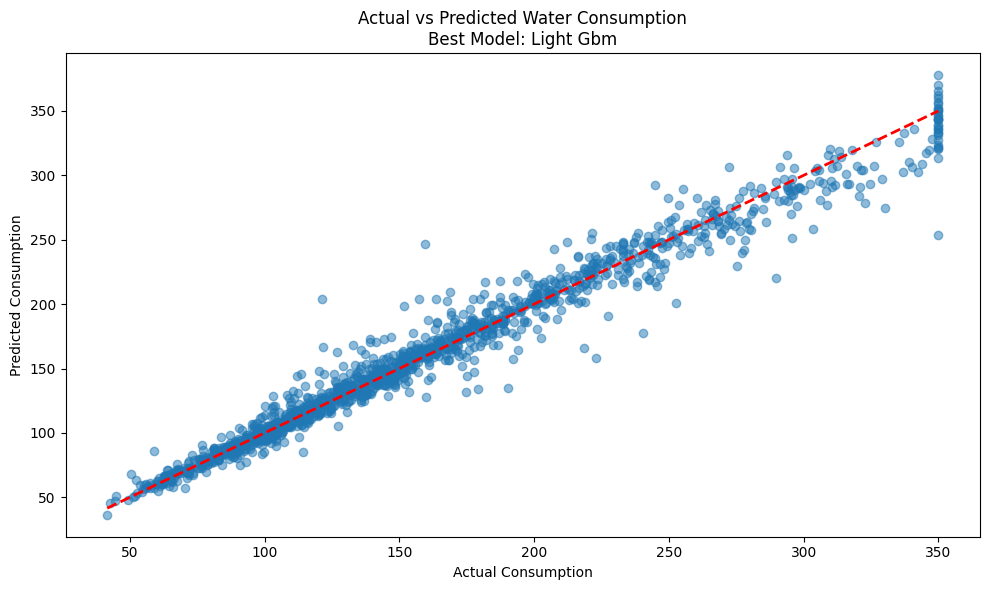

In [16]:
import matplotlib.pyplot as plt

# Print results
results_df = pd.DataFrame({name: {
    'RMSE': res['RMSE'],
    'MAE': res['MAE'],
    'R2': res['R2']
} for name, res in results.items()}).T

print("\nModel Performance Comparison:")
print(results_df)

# Find best model
best_model_name = results_df['R2'].idxmax()
best_model = results[best_model_name]['model']

# Plot actual vs predicted for best model
plt.figure(figsize=(10, 6))
y_pred_best = best_model.predict(X_test_transform)
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.title(f'Actual vs Predicted Water Consumption\nBest Model: {best_model_name}')
plt.tight_layout()
plt.show()

## Hyper tuning

In [17]:
from sklearn.model_selection import GridSearchCV

lgb_model=LGBMRegressor()
lgb_model.fit(X_train_transform,y_train)

# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [ 5, 10, 15],  # -1 means no limit
#     'learning_rate': [0.01, 0.05, 0.1],
#     'num_leaves': [31, 63, 127],   # should be < 2^(max_depth)
#     'min_child_samples': [5, 10, 20],
#     'subsample': [0.8, 0.9, 1.0],
#     # 'colsample_bytree': [0.8, 0.9, 1.0],
#     'reg_alpha': [0, 0.1, 0.5],    # L1 regularization
#     # 'reg_lambda': [0, 0.1, 0.5]    # L2 regularization
# }
param_grid={

    'learning_rate':[ 0.1],
    'max_depth': [5],
    'min_child_samples': [5],
    'n_estimators': [300],
    'num_leaves': [31],
    'reg_alpha': [0.1],
    'subsample': [0.8]
}


grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=9
)
grid_search.fit(X_train_transform,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 12600, number of used features: 14
[LightGBM] [Info] Start training from score 163.900796
Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000547 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 924
[LightGBM] [Info] Number of data points in the train set: 12600, number of used features: 14
[LightGBM] [Info] Start training from score 163.900796
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

GridSearchCV(cv=3, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [5],
                         'min_child_samples': [5], 'n_estimators': [300],
                         'num_leaves': [31], 'reg_alpha': [0.1],
                         'subsample': [0.8]},
             scoring='neg_mean_squared_error', verbose=9)

In [18]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_child_samples': 5,
 'n_estimators': 300,
 'num_leaves': 31,
 'reg_alpha': 0.1,
 'subsample': 0.8}

In [19]:
lgb_model=grid_search.best_estimator_
pred=lgb_model.predict(X_test_transform)
rmse = np.sqrt(mean_absolute_error(y_test, pred))
r2 = r2_score(y_test, pred)

print("\nFinal Model Performance:")
print(f"MAE: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")


Final Model Performance:
MAE: 2.7603
R2 Score: 0.9707


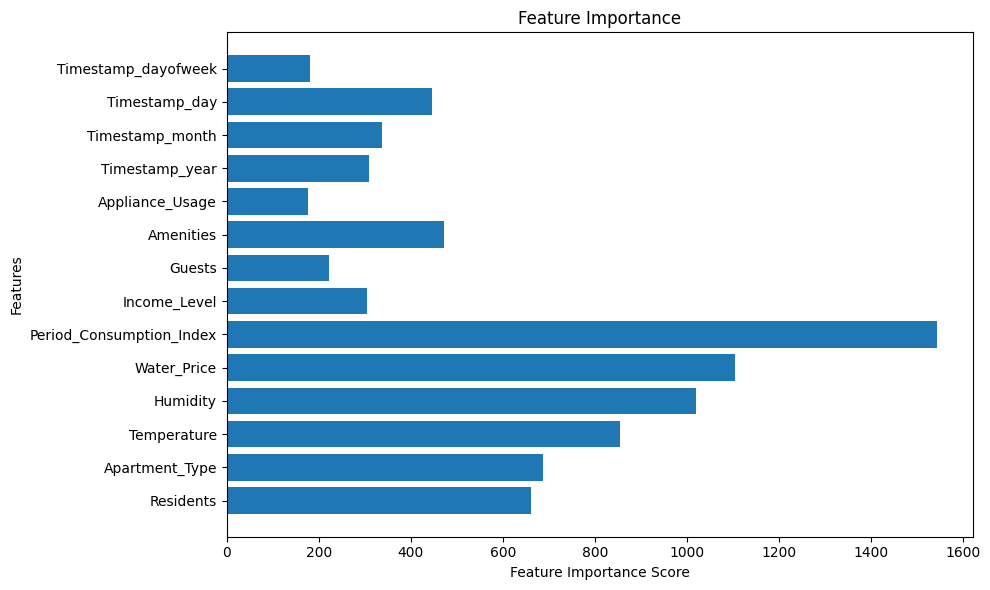

In [20]:
plt.figure(figsize=(10, 6))
plt.barh(X_train.columns,lgb_model.feature_importances_)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance")
plt.tight_layout()
plt.show()

## Prediction on test data

In [21]:
test=pd.read_csv(r'datasets\test.csv')
test

,Timestamp,Residents,Apartment_Type,Temperature,Humidity,Water_Price,Period_Consumption_Index,Income_Level,Guests,Amenities,Appliance_Usage
0,11/10/2014 16,5,Bungalow,11.89,57.88,2.77,1.480000,Upper Middle,1,Jacuzzi,0.0
1,12/10/2014 00,4,Bungalow,29.22,61.41,2.85,1.300000,Upper Middle,0,Garden,NaN
2,12/10/2014 08,3,Cottage,10.27,64.9,1.66,0.970000,Middle,0,NaN,0.0
3,12/10/2014 16,3,1BHK,27.03,52.67,1.48,1.310000,Low,0,NaN,0.0
4,13/10/2014 00,2,Cottage,12.32,55.23,1.19,1.300000,Middle,0,Swimming Pool,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5995,01/04/2020 00,5,2BHK,16.22,54.79,1.09,1.430000,Middle,0,NaN,1.0
5996,01/04/2020 08,3,1BHK,15.65,52.18,1.61,0.900000,Low,0,Garden,0.0
5997,01/04/2020 16,3,Bungalow,16.97,33.14,2.62,1.490000,Rich,0,Fountain,0.0
5998,02/04/2020 00,4,2BHK,19.86,36.94,1.42,1.882674,Middle,0,NaN,0.0


In [22]:
test.dtypes

Timestamp                    object
Residents                     int64
Apartment_Type               object
Temperature                 float64
Humidity                     object
Water_Price                 float64
Period_Consumption_Index    float64
Income_Level                 object
Guests                        int64
Amenities                    object
Appliance_Usage             float64
dtype: object

In [23]:
test.isnull().sum()

Timestamp                      0
Residents                      0
Apartment_Type               166
Temperature                  150
Humidity                       0
Water_Price                    0
Period_Consumption_Index       0
Income_Level                 165
Guests                         0
Amenities                   2513
Appliance_Usage              177
dtype: int64

In [24]:
# Preprocessing
test['Apartment_Type'].fillna(test['Apartment_Type'].mode()[0],inplace=True)
test['Temperature'].fillna(test['Temperature'].mean(),inplace=True)
test['Amenities'].fillna(test['Amenities'].mode()[0],inplace=True)
test['Appliance_Usage'].fillna(test['Appliance_Usage'].mean(),inplace=True)
mode=test['Income_Level'].mode()[0]
test['Income_Level']=test['Income_Level'].apply(lambda x: mode if re.search('^[a-zA-Z0-9[:punct:]]{4,5}$',str(x)) else x)
test['Income_Level'].fillna(mode,inplace=True)
test["Humidity"] = test["Humidity"].astype(str).apply(lambda x: x if re.match(r"^\d+(\.\d+)?$", x) else None)
test['Humidity'] = pd.to_numeric(test['Humidity'], errors='coerce')
test['Humidity'].fillna(test['Humidity'].mean(),inplace=True)

In [25]:
test['Timestamp']=pd.to_datetime(test['Timestamp'],format="mixed",dayfirst=True)
datetime_cols1 = test.select_dtypes(include=['datetime64']).columns
for col in datetime_cols1:
    test[f'{col}_year'] = test[col].dt.year
    test[f'{col}_month'] = test[col].dt.month
    test[f'{col}_day'] = test[col].dt.day
    test[f'{col}_dayofweek'] = test[col].dt.dayofweek


In [26]:
from sklearn.preprocessing import LabelEncoder
cat_features_test=test.select_dtypes(exclude=['int64','float64','int32','datetime64[ns]']).columns
encoder=LabelEncoder()
for col in cat_features_test:
    test[col]=encoder.fit_transform(test[col])

test_data=preprocessor.transform(test)

In [27]:
new_df=pd.DataFrame()
new_df['Timestamp']=test['Timestamp'].values
new_df['Water_Consumption']=lgb_model.predict(test_data)

In [28]:
new_df['Timestamp'] = pd.to_datetime(new_df['Timestamp']).dt.strftime('%d/%m/%Y %H')
new_df.head()

,Timestamp,Water_Consumption
0,11/10/2014 16,305.877007
1,12/10/2014 00,212.325984
2,12/10/2014 08,77.441609
3,12/10/2014 16,121.023065
4,13/10/2014 00,124.636444


In [29]:
new_df.to_csv("Final_prediction.csv",index=False)